# Progress Report 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("merged_top500_clean.csv")

df.head() #confirming that it is loaded correctly

C:\Users\thoma\AppData\Local\Temp\ipykernel_21744\964965853.py:6: DtypeWarning: Columns (24,25,29,31,33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_top500_clean.csv")


,Rank,Site,Manufacturer,Computer,Country,Year,Processors,Nmax,Nhalf,Processor Family,...,Efficiency (%),Power Source,HPCG [TFlop/s],Power Effeciency [GFlops/Watts],Site ID,System ID,Energy Efficiency [GFlops/Watts],RMax (Flop/s),RPeak (Flop/s),Power (W)
0,1,Los Alamos National Laboratory,Thinking Machines Corporation,CM-5/1024,United States,1993,1024.0,52224.0,24064.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.7,131.00,NaN
1,2,Minnesota Supercomputer Center,Thinking Machines Corporation,CM-5/544,United States,1993,544.0,36864.0,16384.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,69.63,NaN
2,3,NCSA,Thinking Machines Corporation,CM-5/512,United States,1993,512.0,36864.0,16384.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,65.54,NaN
3,4,National Security Agency,Thinking Machines Corporation,CM-5/512,United States,1993,512.0,36864.0,16384.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,65.54,NaN
4,5,NEC,NEC,SX-3/44R,Japan,1990,4.0,6400.0,830.0,NEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.2,25.60,NaN


# Complete columns 

In [4]:
# Identify columns with no missing values
complete_columns = [col for col in df.columns if df[col].notnull().all()]
print("Complete columns:", complete_columns)

Complete columns: ['Rank', 'Site', 'Manufacturer', 'Computer', 'Country', 'Year', 'Processors', 'Processor', 'System Family', 'Architecture', 'Segment', 'Continent', 'Publication Date', 'RMax (Flop/s)', 'RPeak (Flop/s)']


In [5]:
top_sites = df['Site'].value_counts().head(10)
print("Top 10 most common sites:")
print(top_sites)

top_manufacturers = df['Manufacturer'].value_counts().head(10)
print("Top 10 most common manufacturers:")
print(top_manufacturers)

Top 10 most common sites:
Site
Government                                1003
Service Provider T                         767
Software Company (M)                       555
Hosting Services                           371
Internet Company                           368
IT Service Provider                        357
Lawrence Livermore National Laboratory     336
Semiconductor Company (C)                  307
Geoscience (P)                             291
Los Alamos National Laboratory             284
Name: count, dtype: int64
Top 10 most common manufacturers:
Manufacturer
IBM                 7252
Hewlett-Packard     5552
Cray Inc.           3062
Lenovo              2691
SGI                 2022
HPE                 1415
Sun Microsystems    1191
Fujitsu              986
Inspur               878
Sugon                799
Name: count, dtype: int64


In [6]:
top_computers = df['Computer'].value_counts().head(10)
print("Top 10 most common computers:")
print(top_computers)

Top 10 most common computers:
Computer
Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G Ethernet          557
SP Power3 375 MHz                                              456
SP PC604e 332 MHz                                              417
ORIGIN 2000                                                    387
SuperDome 875 MHz/HyperPlex                                    364
POWER CHALLENGE                                                361
Cluster Platform 3000 BL460c, Xeon 54xx 3.0GHz, GigEthernet    270
Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G Ethernet         242
HPC 10000 400 MHz Cluster                                      233
HPC 10000                                                      222
Name: count, dtype: int64


In [7]:
top_segments = df['Segment'].value_counts().head(10)
print("Top 10 most common segments:")
print(top_segments)

Top 10 most common segments:
Segment
Industry      15150
Research       7752
Academic       6146
Vendor         1004
Government      933
Classified      876
Others          139
Name: count, dtype: int64


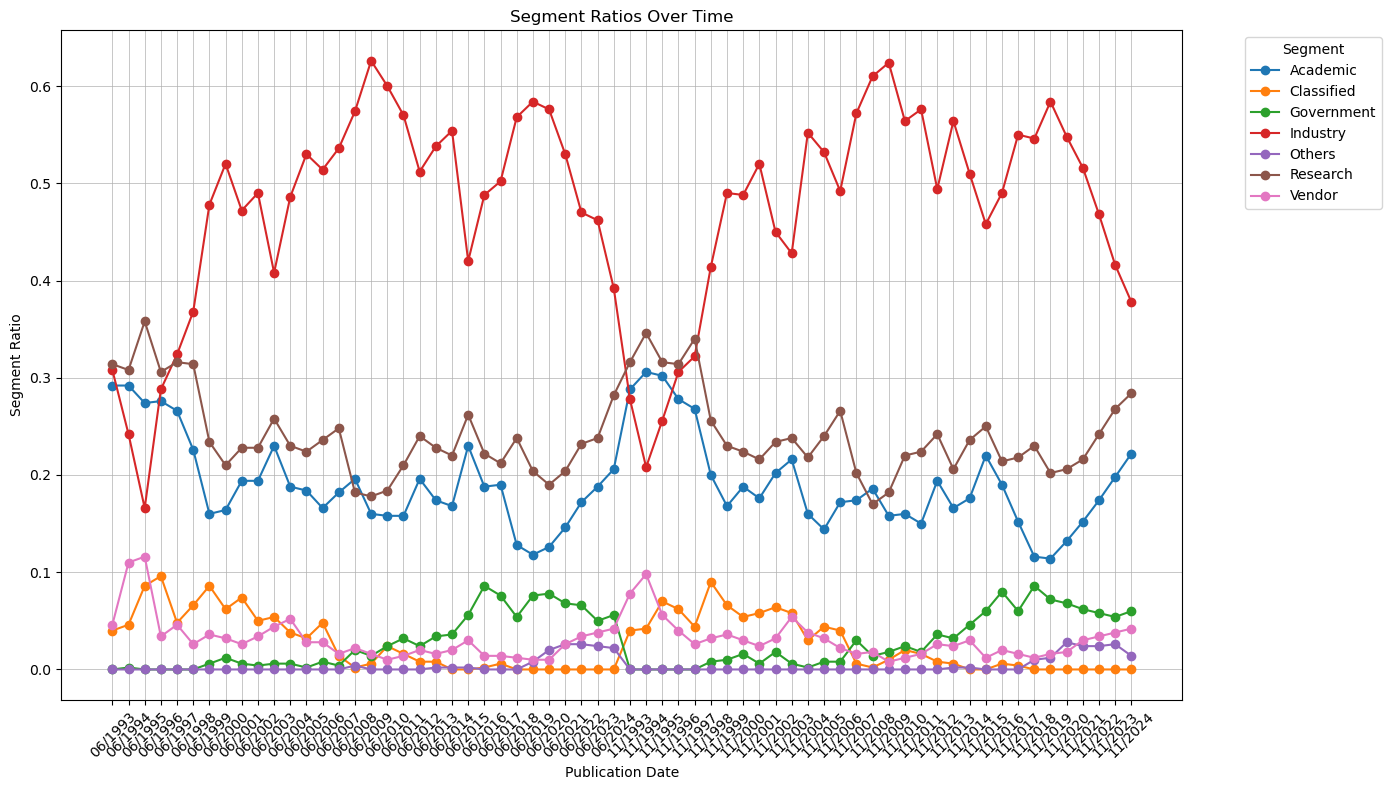

In [8]:
# Group by Publication Date and Segment, and count the occurrences
segment_counts = df.groupby(['Publication Date', 'Segment']).size().unstack(fill_value=0)

# Normalize the counts to get the ratio for each segment
segment_ratios = segment_counts.div(segment_counts.sum(axis=1), axis=0)

# Display the result
# print(segment_ratios)

# Plot the segment ratios over time
plt.figure(figsize=(14, 8))
for segment in segment_ratios.columns:
    plt.plot(segment_ratios.index, segment_ratios[segment], marker='o', label=segment)

plt.xlabel('Publication Date')
plt.ylabel('Segment Ratio')
plt.title('Segment Ratios Over Time')
plt.xticks(rotation=45)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, which='both', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

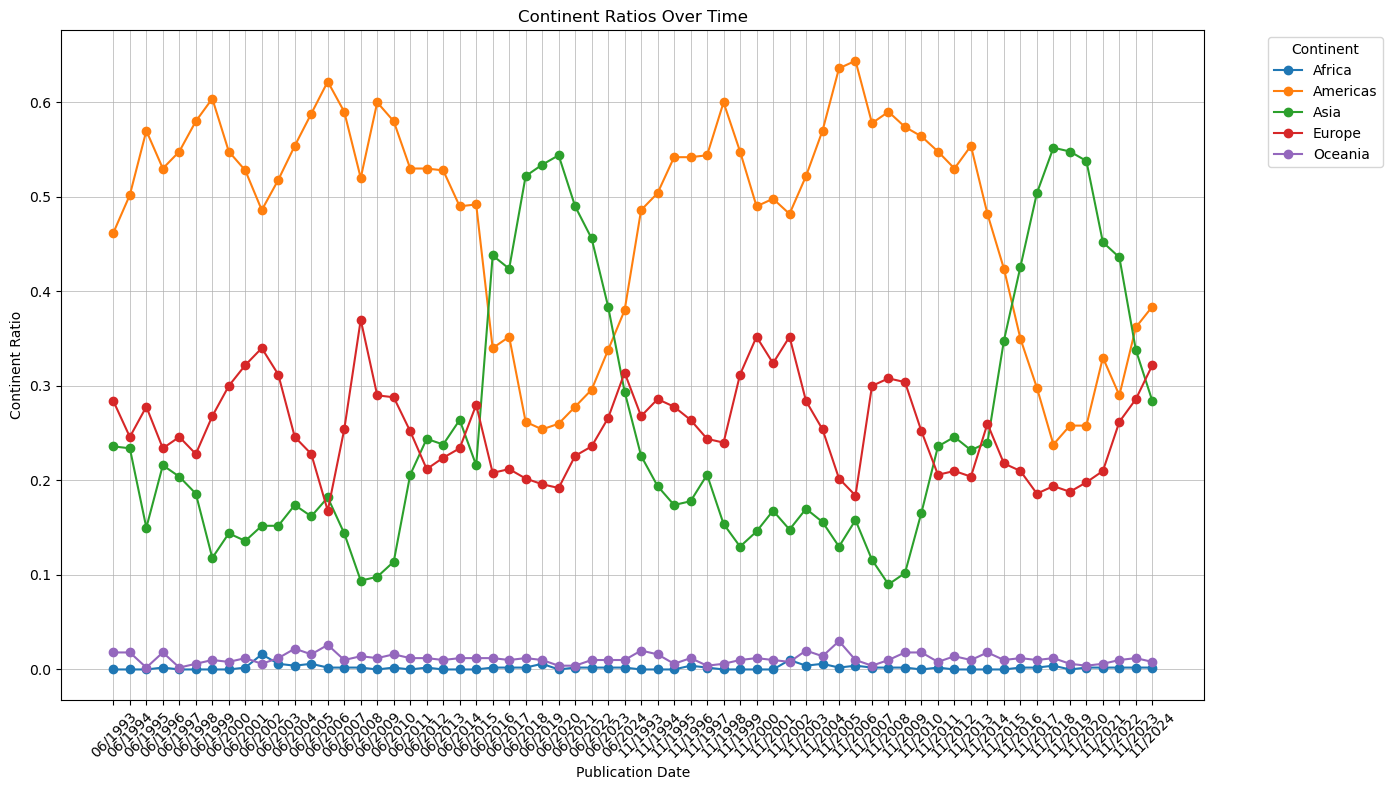

In [9]:
# Group by Publication Date and Continent, and count the occurrences
continent_counts = df.groupby(['Publication Date', 'Continent']).size().unstack(fill_value=0)

# Combine North America and South America into Americas (only a few had problems with this)
continent_counts['Americas'] += continent_counts['North America'] + continent_counts['South America']
continent_counts.drop(['North America', 'South America'], axis=1, inplace=True)

# Normalize the counts to get the ratio for each continent
continent_ratios = continent_counts.div(continent_counts.sum(axis=1), axis=0)

# Plot the continent ratios over time
plt.figure(figsize=(14, 8))
for continent in continent_ratios.columns:
    plt.plot(continent_ratios.index, continent_ratios[continent], marker='o', label=continent)

plt.xlabel('Publication Date')
plt.ylabel('Continent Ratio')
plt.title('Continent Ratios Over Time')
plt.xticks(rotation=45)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, which='both', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [10]:
top_system_families = df['System Family'].value_counts().head(10)
print("Top 10 most common system families:")
print(top_system_families)

Top 10 most common system families:
System Family
IBM Cluster                   2409
HP Cluster Platform 3000BL    2119
IBM SP                        1985
Lenovo ThinkSystem            1537
HP Superdome                  1400
Cray Vector                   1056
Lenovo Cluster                 958
HP Cluster Platform 3000       957
SGI Origin                     948
Sun UltraHPC                   908
Name: count, dtype: int64


In [11]:
missing_publication_date_count = df['Publication Date'].isnull().sum()
print(f"Number of rows missing a publication date: {missing_publication_date_count}")

Number of rows missing a publication date: 0


## Obsolescence Model 

In [22]:
# Import necessary libraries
import pandas as pd

# Assume df is already loaded as per your notebook
# Convert 'Publication Date' to datetime format if not done yet
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

# Using provided columns, define a robust unique identifier for each supercomputer
df['Unique_ID'] = df['System Family'] + '_' + df['Site']

# Compute entry and exit dates for each supercomputer
lifecycle_df = df.groupby('Unique_ID').agg(
    entry_date=('Publication Date', 'min'),
    exit_date=('Publication Date', 'max')
).reset_index()

# Define the most recent publication date in dataset as reference for censorship
latest_date = df['Publication Date'].max()

# Mark censored cases (1 if censored, 0 if event observed)
lifecycle_df['censored'] = lifecycle_df['exit_date'].apply(lambda x: 1 if x == latest_date else 0)

# Calculate lifecycle duration in months
lifecycle_df['duration_months'] = ((lifecycle_df['exit_date'] - lifecycle_df['entry_date']) / pd.Timedelta(days=30)).astype(int)

# Print basic statistics about the data
num_total_computers = lifecycle_df[lifecycle_df['censored'] == 0].shape[0]
num_censored = lifecycle_df['censored'].sum()

# Explain the output clearly
print("\n--- Dataset Summary ---")
print(f"Total number of supercomputers that have entered and subsequently exited the TOP500 list: {num_total_computers}")
print(f"Number of currently active (censored) supercomputers still listed as of the latest data point: {num_censored}")
print("\n--- Explanation of Dataset Columns ---")
print("entry_date: First publication date when the supercomputer appeared on the TOP500 list.")
print("exit_date: Last publication date when the supercomputer appeared (most recent if still active).")
print("censored: 1 if supercomputer is still active (latest date), 0 if it has exited the list.")
print("duration_months: Total duration the supercomputer remained listed, calculated in months.")

# Merge lifecycle_df back with original df to get consistent feature columns
feature_columns = ['Unique_ID', 'Rank', 'Manufacturer', 'Country', 'Year', 'Processors', 
                   'Processor', 'System Family', 'Architecture', 'Segment', 
                   'Continent', 'RMax (Flop/s)', 'RPeak (Flop/s)', 'Publication Date']

# Calculate ratio of RMax to RPeak
performance_df = df.groupby(['Unique_ID', 'Publication Date']).agg(
    RMax=('RMax (Flop/s)', 'mean'),
    RPeak=('RPeak (Flop/s)', 'mean')
).reset_index()

# Calculate ratio
performance_df['RMax_RPeak_ratio'] = performance_df['RMax'] / performance_df['RPeak']

# Get initial ratio per Unique_ID
initial_ratios = performance_df.groupby('Unique_ID')['RMax_RPeak_ratio'].first().reset_index()

# Drop duplicates to keep only the initial record for each Unique_ID
features_df = df[feature_columns].drop_duplicates(subset='Unique_ID', keep='first')

# Merge lifecycle, feature dataframes, and initial ratios
final_df = pd.merge(lifecycle_df, features_df, on='Unique_ID', how='left')
final_df = pd.merge(final_df, initial_ratios, on='Unique_ID', how='left')

# Additional preparation for potential analysis of obsolescence by continent or industry
# Aggregate data to facilitate future segment or continent analysis
continent_segment_df = df.groupby(['Unique_ID', 'Continent', 'Segment']).size().reset_index(name='appearance_count')
final_df = pd.merge(final_df, continent_segment_df[['Unique_ID', 'Continent', 'Segment']], on='Unique_ID', how='left', suffixes=('', '_agg'))

# Inspect the resulting dataframe
print("\n--- Final DataFrame Preview ---")
print(final_df.head())


--- Dataset Summary ---
Total number of supercomputers that have entered and subsequently exited the TOP500 list: 4359
Number of currently active (censored) supercomputers still listed as of the latest data point: 298

--- Explanation of Dataset Columns ---
entry_date: First publication date when the supercomputer appeared on the TOP500 list.
exit_date: Last publication date when the supercomputer appeared (most recent if still active).
censored: 1 if supercomputer is still active (latest date), 0 if it has exited the list.
duration_months: Total duration the supercomputer remained listed, calculated in months.

--- Final DataFrame Preview ---
                                           Unique_ID entry_date  exit_date  \
0   IBM Power Systems_Barcelona Supercomputing Ce... 2018-06-01 2019-11-01   
1                           IBM Power Systems_CINECA 2020-06-01 2023-11-01   
2                    IBM Power Systems_DOE/NNSA/LLNL 2018-06-01 2024-11-01   
3                    IBM Power Syst

Iteration 1: norm_delta = 4.27e-01, step_size = 0.9500, log_lik = -2250.46711, newton_decrement = 3.90e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 6.83e-01, step_size = 0.9500, log_lik = -2905.30392, newton_decrement = 9.41e+02, seconds_since_start = 0.0
Iteration 3: norm_delta = 6.56e-01, step_size = 0.9500, log_lik = -2249.53821, newton_decrement = 2.71e+01, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.03e-01, step_size = 0.9310, log_lik = -2228.06220, newton_decrement = 1.48e+00, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.16e-02, step_size = 1.0000, log_lik = -2226.48207, newton_decrement = 3.82e-02, seconds_since_start = 0.0
Iteration 6: norm_delta = 1.48e-03, step_size = 1.0000, log_lik = -2226.44158, newton_decrement = 4.52e-04, seconds_since_start = 0.0
Iteration 7: norm_delta = 2.39e-05, step_size = 1.0000, log_lik = -2226.44112, newton_decrement = 1.12e-07, seconds_since_start = 0.0
Iteration 8: norm_delta = 5.99e-09, step_size = 1.0000, log_li

<lifelines.CoxPHFitter: fitted with 4895 total observations, 4553 right-censored observations>
             duration col = 'duration_months'
                event col = 'censored'
      baseline estimation = breslow
   number of observations = 4895
number of events observed = 342
   partial log-likelihood = -2226.44
         time fit was run = 2025-04-13 20:11:33 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
Rank             -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
Processors        0.00      1.00      0.00            0.00            0.00                1.00                1.00
RMax_RPeak_ratio  0.12      1.13      0.25           -0.37            0.60                0.69                1.83

                  cmp to     z      p  -log2(p)
covariate                                      
Rank                0.00 -4.94 <0.005     20.30
Processors          0.00  5.15 <0.005     21.87
RMax_RPeak_ratio    0.00  0.48   0.63      0.66
---
Concordance = 0.63
Partial AIC = 4458.88
log-likelihood ratio test = 48.05 on 3 df
-log2(p) of ll-ratio test = 32.17

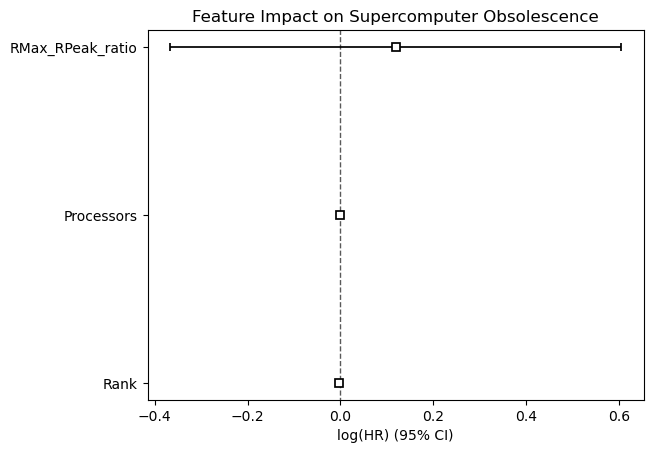

In [24]:
# Import necessary libraries for modeling
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Assume final_df is already prepared from the previous step

# Step 1: Prepare the data for modeling
# Select relevant features for the model
model_features = ['duration_months', 'censored', 'Rank', 'Processors', 'RMax_RPeak_ratio']

# Drop rows with any missing values in these critical columns (if any)
model_data = final_df[model_features].dropna()

# Step 2: Initialize the Cox Proportional Hazards model
cph = CoxPHFitter()

# Step 3: Fit the model
cph.fit(model_data, duration_col='duration_months', event_col='censored', show_progress=True)

# Step 4: Print the summary of the model to understand feature impacts
print("\n--- Model Summary ---")
cph.print_summary()

# Step 5: Visualize the coefficients
cph.plot()
plt.title("Feature Impact on Supercomputer Obsolescence")
plt.show()


Dropped Segment_clean_Classified due to near-complete separation.
Iteration 1: norm_delta = 6.87e-01, step_size = 0.9500, log_lik = -1527.73732, newton_decrement = 1.20e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.85e-01, step_size = 0.9500, log_lik = -1556.65094, newton_decrement = 1.12e+02, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.63e-02, step_size = 0.9500, log_lik = -1450.32827, newton_decrement = 1.86e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 9.13e-03, step_size = 1.0000, log_lik = -1448.24553, newton_decrement = 1.21e-01, seconds_since_start = 0.0
Iteration 5: norm_delta = 8.75e-04, step_size = 1.0000, log_lik = -1448.11777, newton_decrement = 9.53e-04, seconds_since_start = 0.0
Iteration 6: norm_delta = 7.21e-06, step_size = 1.0000, log_lik = -1448.11681, newton_decrement = 6.38e-08, seconds_since_start = 0.0
Convergence success after 6 iterations.
Training Concordance Index with cleaned features and penalizer: 0.82
Test Concordance Inde

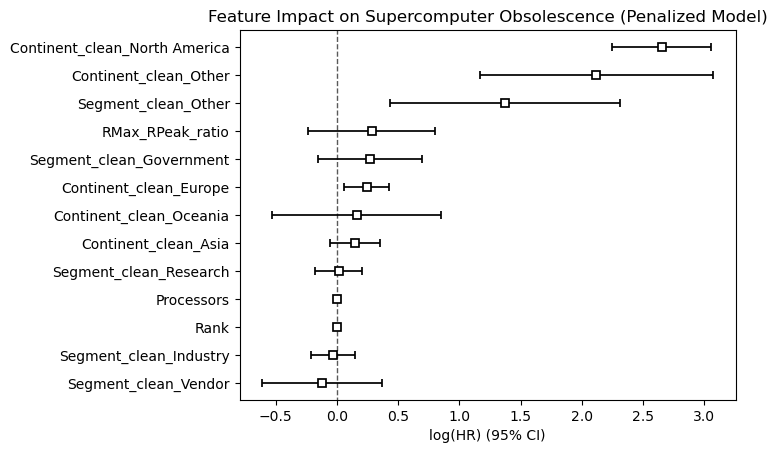

In [31]:
# Import necessary libraries
from lifelines.utils import concordance_index
from sklearn.model_selection import train_test_split
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Step 1: Simplify categorical variables
segment_counts = final_df['Segment'].value_counts()
continent_counts = final_df['Continent'].value_counts()

final_df['Segment_clean'] = final_df['Segment'].apply(lambda x: x if segment_counts[x] > 50 else 'Other')
final_df['Continent_clean'] = final_df['Continent'].apply(lambda x: x if continent_counts[x] > 50 else 'Other')

# Step 2: Prepare data with cleaned categorical variables
model_data = final_df.copy()
model_features = ['duration_months', 'censored', 'Rank', 'Processors', 'RMax_RPeak_ratio', 'Segment_clean', 'Continent_clean']

model_data = model_data[model_features].dropna()

# Step 3: Convert to dummy variables safely
model_data = pd.get_dummies(model_data, columns=['Segment_clean', 'Continent_clean'], drop_first=True)

# Step 4: Manually drop problematic column identified in warning
if 'Segment_clean_Classified' in model_data.columns:
    model_data = model_data.drop(columns=['Segment_clean_Classified'])
    print("Dropped Segment_clean_Classified due to near-complete separation.")

# Step 5: Split the data into training and testing sets
train_df, test_df = train_test_split(model_data, test_size=0.3, random_state=42)

# Step 6: Initialize and fit Cox model on training data with penalizer
cph = CoxPHFitter(penalizer=0.1)  # ✅ Add penalizer to handle collinearity
cph.fit(train_df, duration_col='duration_months', event_col='censored', show_progress=True)

# Step 7: Evaluate on training data
train_cindex = concordance_index(
    train_df['duration_months'], -cph.predict_partial_hazard(train_df), train_df['censored']
)
print(f"Training Concordance Index with cleaned features and penalizer: {train_cindex:.2f}")

# Step 8: Evaluate on test data
test_cindex = concordance_index(
    test_df['duration_months'], -cph.predict_partial_hazard(test_df), test_df['censored']
)
print(f"Test Concordance Index with cleaned features and penalizer: {test_cindex:.2f}")

# Step 9: Visualize feature importance
cph.plot()
plt.title("Feature Impact on Supercomputer Obsolescence (Penalized Model)")
plt.show()


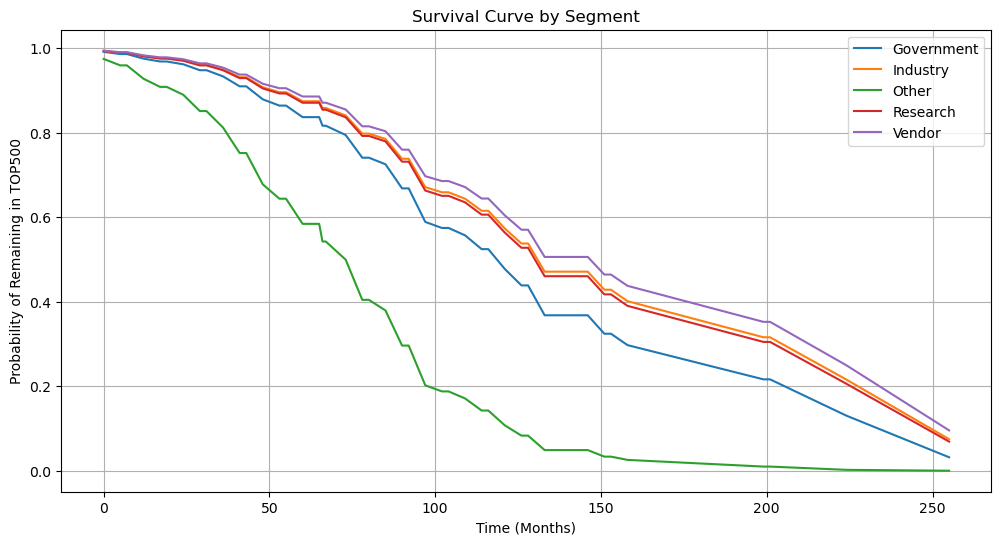

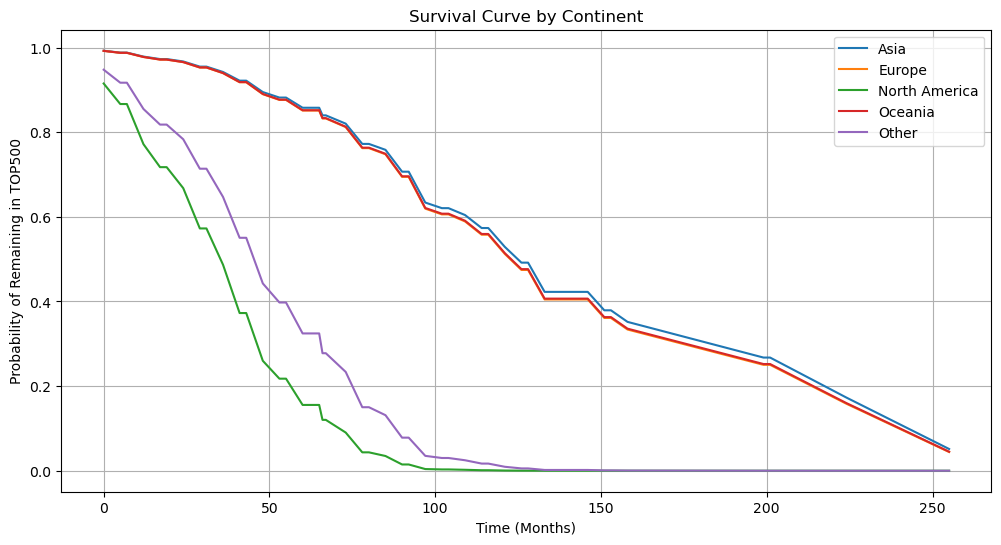

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create survival functions for different segments and continents

# We will use the trained Cox model (cph) and create representative samples for segments and continents

# Step 1a: Prepare base example data point (mean values)
base_features = train_df.drop(columns=['duration_months', 'censored']).mean().to_frame().T

# Step 1b: Get unique segments and continents from the dataset
segments = [col for col in train_df.columns if 'Segment_clean_' in col]
continents = [col for col in train_df.columns if 'Continent_clean_' in col]

# Step 2: Plot survival curves by Segment
plt.figure(figsize=(12, 6))
for segment in segments:
    example = base_features.copy()
    example[segment] = 1  # Set the segment indicator
    survival_func = cph.predict_survival_function(example)
    plt.plot(survival_func.index, survival_func.values.flatten(), label=segment.replace('Segment_clean_', ''))

plt.title('Survival Curve by Segment')
plt.xlabel('Time (Months)')
plt.ylabel('Probability of Remaining in TOP500')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Plot survival curves by Continent
plt.figure(figsize=(12, 6))
for continent in continents:
    example = base_features.copy()
    example[continent] = 1  # Set the continent indicator
    survival_func = cph.predict_survival_function(example)
    plt.plot(survival_func.index, survival_func.values.flatten(), label=continent.replace('Continent_clean_', ''))

plt.title('Survival Curve by Continent')
plt.xlabel('Time (Months)')
plt.ylabel('Probability of Remaining in TOP500')
plt.legend()
plt.grid(True)
plt.show()
